In [60]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [61]:
import pandas as pd
import numpy as np
from dateutil import parser

import seaborn as sns
import matplotlib as plt

%matplotlib inline

#Read in Data

In [62]:
product = pd.read_csv("product.csv",skipinitialspace=True)
product_class = pd.read_csv("product_class.csv",skipinitialspace=True)
promotion = pd.read_csv("promotion.csv", names=['promotion_id',
                                                'promotion_district_id','promotion_name','media_type',
                                                'cost', 'start_date','end_date','filler_title','filler_title2'],
                       skipinitialspace=True,
                       skiprows = [0,1]) 
transactions = pd.read_csv("transactions.csv",skipinitialspace=True)

Notes: 
    - A few of the columns were missing in the promotion dats, so I named them directly when reading in the data
    - There was also additional white space so I took care of it with skipinitialspace

#Exploratory Data Analysis (EDA)

First thing we'll do is explore the data to see if we need to clean anything up. Typically I like to look at three things for every new data set:
    - A quick glance at the data overall
    - A count of the varaibles in each column to see if any data is missing
    - A look at the data types for all of the columns in the data to see if there's anything we should change
        


##Product

In [63]:
product.head(3)

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,30,1,'Washington','Washington Berry Juice',90748583674,'2.8500',8.39,6.39,0,0,30,14,16.9,12.60,7.40
1,52,2,'Washington','Washington Mango Drink',96516502499,'0.7400',7.42,4.42,0,1,18,8,13.4,3.71,22.60
2,52,3,'Washington','Washington Strawberry Drink',58427771925,'0.8300',13.10,11.10,1,1,17,13,14.4,11.00,7.77


In [64]:
product.count()

product_class_id      1560
product_id            1560
brand_name            1560
product_name          1560
SKU                   1560
SRP                   1560
gross_weight          1560
net_weight            1560
recyclable_package    1560
low_fat               1560
units_per_case        1560
cases_per_pallet      1560
shelf_width           1560
shelf_height          1560
shelf_depth           1560
dtype: int64

In [65]:
product.dtypes

product_class_id        int64
product_id              int64
brand_name             object
product_name           object
SKU                     int64
SRP                    object
gross_weight          float64
net_weight            float64
recyclable_package      int64
low_fat                 int64
units_per_case          int64
cases_per_pallet        int64
shelf_width           float64
shelf_height          float64
shelf_depth           float64
dtype: object

In [66]:
transactions.head()

,product_id,customer_id,store_id,promotion_id,month_of_year,quarter,the_year,store_sales,store_cost,unit_sales,fact_count
0,1,157,24,1869,12,'Q4',1997,'8.5500','2.9925','3.0000',1
1,1,456,15,0,6,'Q2',1997,'11.4000','4.3320','4.0000',1
2,1,638,11,0,9,'Q3',1997,'8.5500','2.9925','3.0000',1
3,1,916,7,0,4,'Q2',1997,'11.4000','4.9020','4.0000',1
4,1,923,15,0,7,'Q3',1997,'8.5500','2.7360','3.0000',1


In [67]:
product.head()

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,30,1,'Washington','Washington Berry Juice',90748583674,'2.8500',8.39,6.39,0,0,30,14,16.9,12.60,7.40
1,52,2,'Washington','Washington Mango Drink',96516502499,'0.7400',7.42,4.42,0,1,18,8,13.4,3.71,22.60
2,52,3,'Washington','Washington Strawberry Drink',58427771925,'0.8300',13.10,11.10,1,1,17,13,14.4,11.00,7.77
3,19,4,'Washington','Washington Cream Soda',64412155747,'3.6400',10.60,9.60,1,0,26,10,22.9,18.90,7.93
4,19,5,'Washington','Washington Diet Soda',85561191439,'2.1900',6.66,4.65,1,0,7,10,20.7,21.90,19.20


In [68]:
product_class.head()

,product_class_id,product_subcategory,product_category,product_department,product_family
0,1,'Nuts','Specialty','Produce','Food'
1,2,'Shellfish','Seafood','Seafood','Food'
2,3,'Canned Fruit','Fruit','Canned Products','Food'
3,4,'Spices','Baking Goods','Baking Goods','Food'
4,5,'Pasta','Starchy Foods','Starchy Foods','Food'


##Product Class

In [69]:
product_class.head(3)

,product_class_id,product_subcategory,product_category,product_department,product_family
0,1,'Nuts','Specialty','Produce','Food'
1,2,'Shellfish','Seafood','Seafood','Food'
2,3,'Canned Fruit','Fruit','Canned Products','Food'


In [70]:
product_class.count()

product_class_id       110
product_subcategory    110
product_category       110
product_department     110
product_family         110
dtype: int64

In [71]:
product_class.dtypes

product_class_id        int64
product_subcategory    object
product_category       object
product_department     object
product_family         object
dtype: object

##Promotion

In [72]:
promotion.head(3)

,promotion_id,promotion_district_id,promotion_name,media_type,cost,start_date,end_date,filler_title,filler_title2
0,1,110,'High Roller Savings','Product Attachment','14435.0000','1996-01-03 00:00:00','1996-01-06 00:00:00',NaN,NaN
1,2,110,'Green Light Special','Product Attachment','8907.0000','1996-01-18 00:00:00','1996-01-20 00:00:00',NaN,NaN
2,3,110,'Wallet Savers','Radio','12512.0000','1996-02-02 00:00:00','1996-02-05 00:00:00',NaN,NaN


In [73]:
promotion.count()

promotion_id             1863
promotion_district_id    1863
promotion_name           1863
media_type               1863
cost                     1863
start_date               1863
end_date                 1863
filler_title              586
filler_title2             288
dtype: int64

In [74]:
promotion.dtypes

promotion_id              int64
promotion_district_id     int64
promotion_name           object
media_type               object
cost                     object
start_date               object
end_date                 object
filler_title             object
filler_title2            object
dtype: object

##Transactions

In [75]:
transactions.head()

,product_id,customer_id,store_id,promotion_id,month_of_year,quarter,the_year,store_sales,store_cost,unit_sales,fact_count
0,1,157,24,1869,12,'Q4',1997,'8.5500','2.9925','3.0000',1
1,1,456,15,0,6,'Q2',1997,'11.4000','4.3320','4.0000',1
2,1,638,11,0,9,'Q3',1997,'8.5500','2.9925','3.0000',1
3,1,916,7,0,4,'Q2',1997,'11.4000','4.9020','4.0000',1
4,1,923,15,0,7,'Q3',1997,'8.5500','2.7360','3.0000',1


In [76]:
transactions.count()

product_id       173602
customer_id      173602
store_id         173602
promotion_id     173602
month_of_year    173602
quarter          173602
the_year         173602
store_sales      173602
store_cost       173602
unit_sales       173602
fact_count       173602
dtype: int64

In [77]:
transactions.dtypes

product_id        int64
customer_id       int64
store_id          int64
promotion_id      int64
month_of_year     int64
quarter          object
the_year          int64
store_sales      object
store_cost       object
unit_sales       object
fact_count       object
dtype: object

**EDA Oberservations**

A few things to note:

     -Most of the data isn't missing, so that's a plus - except for the promotion data. We'll remove the missing data because it's only one line and it specificially saya no media, etc so my thought is that it was used for testing purposes
     -We'll change a few datatypes as most of them are objects that should be strings or ints or dates, for example
     -Promotions will need some more work as the values look to be shifted over (as if they were originally in the same coulumn and someone used text to columns). To fix this I plan on making new values in the media_type for example media type can be both radio and tv, so we'll add them together

#Data Cleaning

In [78]:
def to_float(x):
    return float(x[1:-1])

def to_str(x):
    return str(x[1:-1])

In [79]:
product.brand_name = product.brand_name.apply(to_str)
product.product_name = product.product_name.apply(to_str)
product.SRP = product.SRP.apply(to_float)

product_class.product_subcategory = product_class.product_subcategory.apply(to_str)
product_class.product_category = product_class.product_category.apply(to_str)
product_class.product_department = product_class.product_department.apply(to_str)
product_class.product_family = product_class.product_family.apply(to_str)

transactions.quarter = transactions.quarter.apply(to_str)
transactions.store_sales = transactions.store_sales.apply(to_float)
transactions.store_cost = transactions.store_cost.apply(to_float)
transactions.unit_sales = transactions.unit_sales.apply(to_float)
transactions.fact_count = transactions.fact_count.replace('1);',1) #deal with messy data
transactions.fact_count = transactions.fact_count.apply(int)

In [80]:
transactions.head()

,product_id,customer_id,store_id,promotion_id,month_of_year,quarter,the_year,store_sales,store_cost,unit_sales,fact_count
0,1,157,24,1869,12,Q4,1997,8.55,2.9925,3,1
1,1,456,15,0,6,Q2,1997,11.40,4.3320,4,1
2,1,638,11,0,9,Q3,1997,8.55,2.9925,3,1
3,1,916,7,0,4,Q2,1997,11.40,4.9020,4,1
4,1,923,15,0,7,Q3,1997,8.55,2.7360,3,1


**CLEANING PROMOTION**

In [81]:
promotion.head()

,promotion_id,promotion_district_id,promotion_name,media_type,cost,start_date,end_date,filler_title,filler_title2
0,1,110,'High Roller Savings','Product Attachment','14435.0000','1996-01-03 00:00:00','1996-01-06 00:00:00',NaN,NaN
1,2,110,'Green Light Special','Product Attachment','8907.0000','1996-01-18 00:00:00','1996-01-20 00:00:00',NaN,NaN
2,3,110,'Wallet Savers','Radio','12512.0000','1996-02-02 00:00:00','1996-02-05 00:00:00',NaN,NaN
3,4,110,'Weekend Markdown','In-Store Coupon','11256.0000','1996-02-13 00:00:00','1996-02-15 00:00:00',NaN,NaN
4,5,110,'Bag Stuffers','Sunday Paper,Radio','12275.0000','1996-02-28 00:00:00','1996-03-01 00:00:00',NaN


In [82]:
promotion.cost = promotion.cost.replace("Radio'","Radio")
promotion.start_date = promotion.start_date.replace("TV'","TV")
promotion.media_type = promotion.media_type.replace("'Daily Paper","'Daily Paper'")
promotion.media_type = promotion.media_type.replace("'Sunday Paper","'Sunday Paper'")

In [83]:
promotion.media_type = promotion.media_type.apply(to_str)
promotion.promotion_name = promotion.promotion_name.apply(to_str)

In [84]:
def get_media_type(df):
    if (df.cost == "Radio") and (df.start_date == "TV"):
        val = df.media_type + " & Radio & TV"
    elif (df.cost == "Radio") and (df.start_date != "TV"):
        val = df.media_type + " & Radio"
    else:
        val = df.media_type
    return val

In [85]:
promotion["clean_media_type"] = promotion.apply(get_media_type,axis =1)

In [86]:
promotion.head()

,promotion_id,promotion_district_id,promotion_name,media_type,cost,start_date,end_date,filler_title,filler_title2,clean_media_type
0,1,110,High Roller Savings,Product Attachment,'14435.0000','1996-01-03 00:00:00','1996-01-06 00:00:00',NaN,NaN,Product Attachment
1,2,110,Green Light Special,Product Attachment,'8907.0000','1996-01-18 00:00:00','1996-01-20 00:00:00',NaN,NaN,Product Attachment
2,3,110,Wallet Savers,Radio,'12512.0000','1996-02-02 00:00:00','1996-02-05 00:00:00',NaN,NaN,Radio
3,4,110,Weekend Markdown,In-Store Coupon,'11256.0000','1996-02-13 00:00:00','1996-02-15 00:00:00',NaN,NaN,In-Store Coupon
4,5,110,Bag Stuffers,Sunday Paper,Radio,'12275.0000','1996-02-28 00:00:00','1996-03-01 00:00:00',NaN,Sunday Paper & Radio


In [87]:
def get_cost(df):
    if (df.cost == "Radio") and (df.start_date == "TV"):
        val = df.end_date
    elif (df.cost == "Radio") and (df.start_date != "TV"):
        val = df.start_date
    else:
        val = df.cost
    return val

In [88]:
promotion["clean_cost"] = promotion.apply(get_cost,axis =1)

In [89]:
def get_start_date(df):
    if (df.cost == "Radio") and (df.start_date == "TV"):
        val = df.filler_title
    elif (df.cost == "Radio") and (df.start_date != "TV"):
        val = df.end_date
    else:
        val = df.start_date
    return val

In [90]:
promotion["clean_start_date"] = promotion.apply(get_start_date,axis =1)

In [91]:
def get_end_date(df):
    if (df.cost == "Radio") and (df.start_date == "TV"):
        val = df.filler_title2
    elif (df.cost == "Radio") and (df.start_date != "TV"):
        val = df.filler_title
    else:
        val = df.end_date
    return val

In [92]:
promotion["clean_end_date"] = promotion.apply(get_end_date,axis =1)

In [93]:
promo_cols = ['promotion_id',
 'promotion_district_id',
 'promotion_name',
 'clean_media_type',
 'clean_cost',
 'clean_start_date',
 'clean_end_date']

In [94]:
promotion = promotion[promo_cols]
promotion = promotion.rename(columns={"clean_media_type":"media_type","clean_cost":"cost","clean_start_date":"start_date","clean_end_date":"end_date"})

In [95]:
promotion.cost = promotion.cost.apply(to_float)

In [96]:
def to_date(x):
    return parser.parse(x[1:-1])

In [97]:
promotion.start_date = promotion.start_date.apply(to_date)
promotion.end_date = promotion.end_date.apply(to_date)

In [98]:
promotion.head()

,promotion_id,promotion_district_id,promotion_name,media_type,cost,start_date,end_date
0,1,110,High Roller Savings,Product Attachment,14435,1996-01-03,1996-01-06
1,2,110,Green Light Special,Product Attachment,8907,1996-01-18,1996-01-20
2,3,110,Wallet Savers,Radio,12512,1996-02-02,1996-02-05
3,4,110,Weekend Markdown,In-Store Coupon,11256,1996-02-13,1996-02-15
4,5,110,Bag Stuffers,Sunday Paper & Radio,12275,1996-02-28,1996-03-01


In [99]:
promotion.dtypes

promotion_id                      int64
promotion_district_id             int64
promotion_name                   object
media_type                       object
cost                            float64
start_date               datetime64[ns]
end_date                 datetime64[ns]
dtype: object

In [100]:
promotion.count()

promotion_id             1863
promotion_district_id    1863
promotion_name           1863
media_type               1863
cost                     1863
start_date               1863
end_date                 1863
dtype: int64

For the promotion data, I wrote a few functions to combine data from other columns based on conditional factors in other columns. This allowed me to have all of the clean data in each column and then we just had to drop the dirty data. I also went ahead and changed the date types to datetime objects incase any analysis needed to be done with those. Finally, I again checked the data, data types, and counts just to make sure everything looked as expected.

#Question 1

Management is trying to better understand what is happening at these food marts. To that end, please create some visualizations to help us better understand the following dimensions of the Foodmart data:

- Category of products sold
- Brand of products sold

The first thing i'll do is join some of the data so that we can see the full product dataset.

In [101]:
product_data = pd.merge(product,product_class,how = "left",on ="product_class_id")
product_data.head()

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,product_subcategory,product_category,product_department,product_family
0,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,0,0,30,14,16.9,12.60,7.40,Juice,Pure Juice Beverages,Beverages,Drink
1,52,2,Washington,Washington Mango Drink,96516502499,0.74,7.42,4.42,0,1,18,8,13.4,3.71,22.60,Flavored Drinks,Drinks,Beverages,Drink
2,52,3,Washington,Washington Strawberry Drink,58427771925,0.83,13.10,11.10,1,1,17,13,14.4,11.00,7.77,Flavored Drinks,Drinks,Beverages,Drink
3,19,4,Washington,Washington Cream Soda,64412155747,3.64,10.60,9.60,1,0,26,10,22.9,18.90,7.93,Soda,Carbonated Beverages,Beverages,Drink
4,19,5,Washington,Washington Diet Soda,85561191439,2.19,6.66,4.65,1,0,7,10,20.7,21.90,19.20,Soda,Carbonated Beverages,Beverages,Drink


**Top 10 Selling Product Categories**

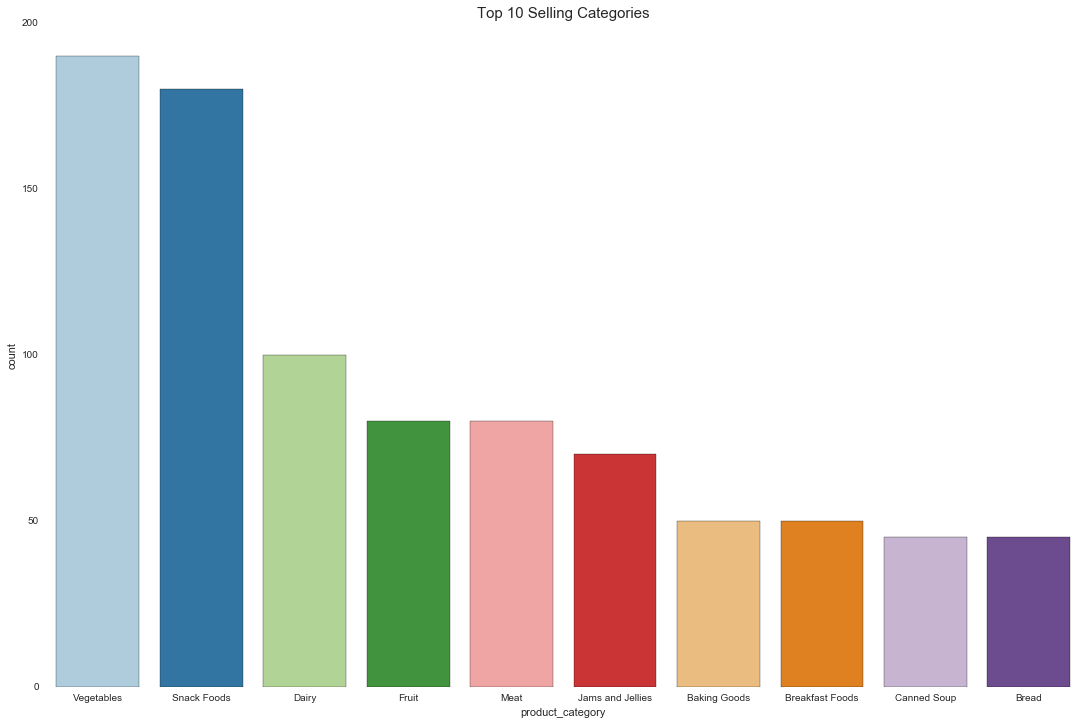

In [102]:
g = sns.factorplot(x="product_category", data=product_data, kind="count",
                   palette="Paired", size=10, aspect=1.5, order=product_data.product_category.value_counts().iloc[:10].index)
sns.plt.title('Top 10 Selling Categories',fontsize=15)

**Bottom 10 Selling Product Categories**

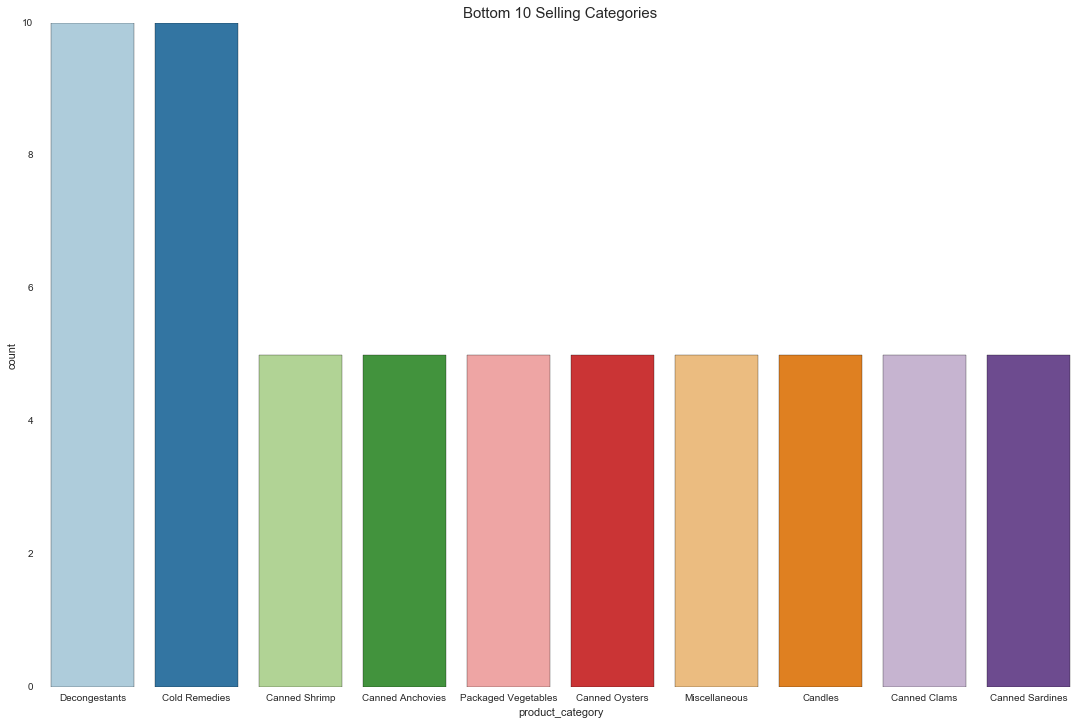

In [103]:
g = sns.factorplot(x="product_category", data=product_data, kind="count",
                   palette="Paired", size=10, aspect=1.5, order=product_data.product_category.value_counts().iloc[-10:].index)
sns.plt.title('Bottom 10 Selling Categories',fontsize=15)

**Top 10 Selling Brands**

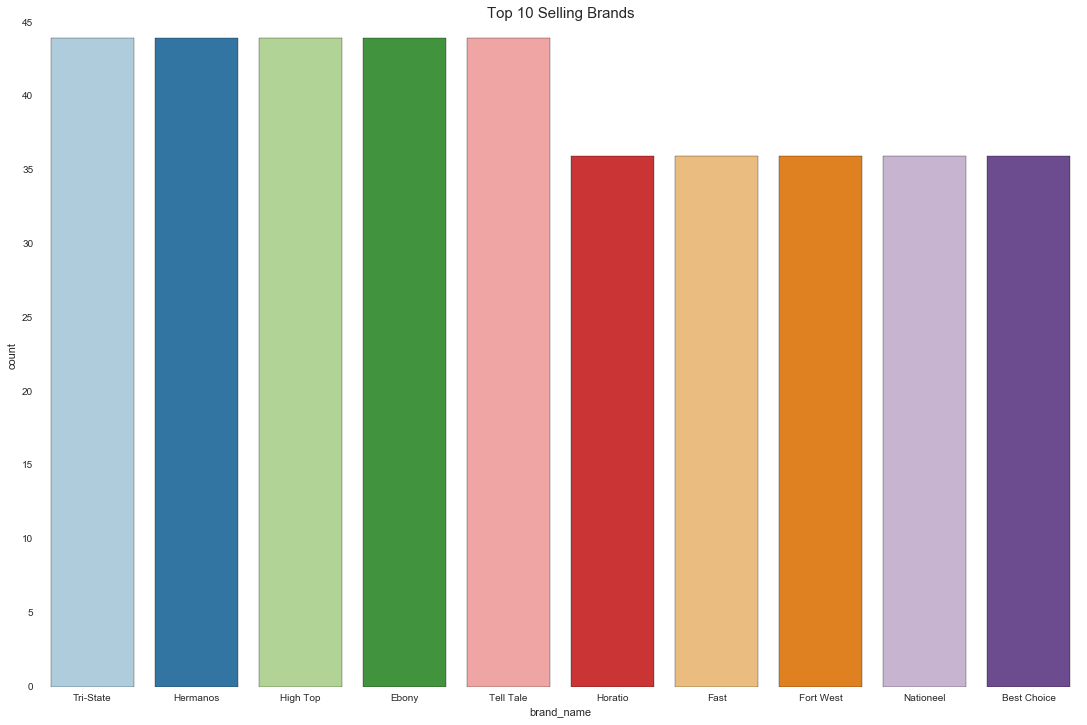

In [104]:
g = sns.factorplot(x="brand_name", data=product_data, kind="count",
                   palette="Paired", size=10, aspect=1.5, order=product_data.brand_name.value_counts().iloc[:10].index)
sns.plt.title('Top 10 Selling Brands',fontsize=15)

**Bottom 10 Selling Brand Name**

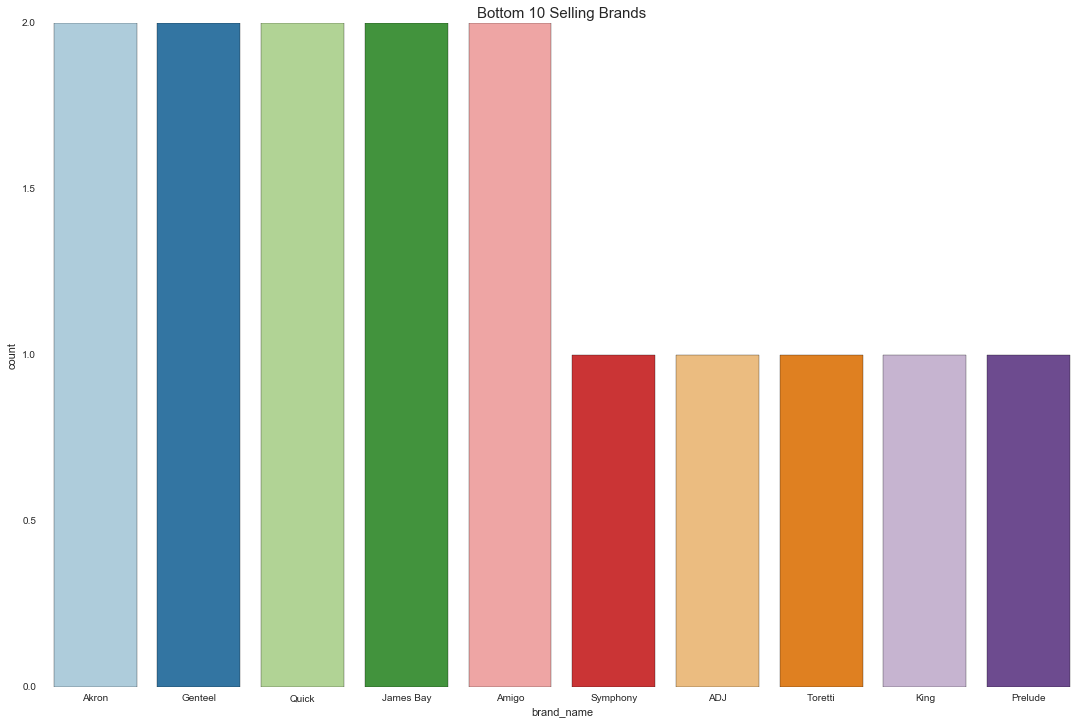

In [105]:
g = sns.factorplot(x="brand_name", data=product_data, kind="count",
                   palette="Paired", size=10, aspect=1.5, order=product_data.brand_name.value_counts().iloc[-10:].index)
sns.plt.title('Bottom 10 Selling Brands',fontsize=15)

While it's nice to see how the categories and brands are doing overall, it might be more helpful to look at how they're doing through out the year. We can use the transaction data to see how these same groups performed over the year by quarter. Lets just look at how the top 10 by product category and brand.

In [106]:
product_data_quarter =  pd.merge(product_data,transactions,how="left",on="product_id")

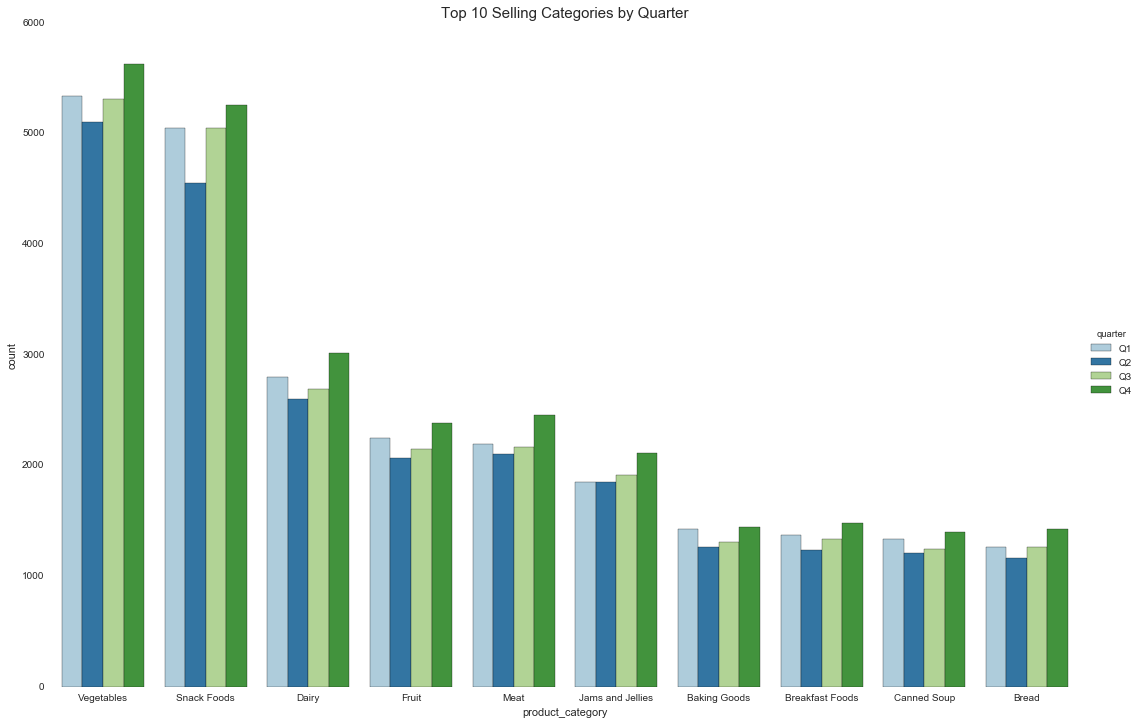

In [107]:
g = sns.factorplot(x="product_category",hue = "quarter", data=product_data_quarter, kind="count",
                   palette="Paired", size=10, aspect=1.5, order=product_data.product_category.value_counts().iloc[:10].index, hue_order =["Q1","Q2","Q3","Q4"])
sns.plt.title('Top 10 Selling Categories by Quarter',fontsize=15)

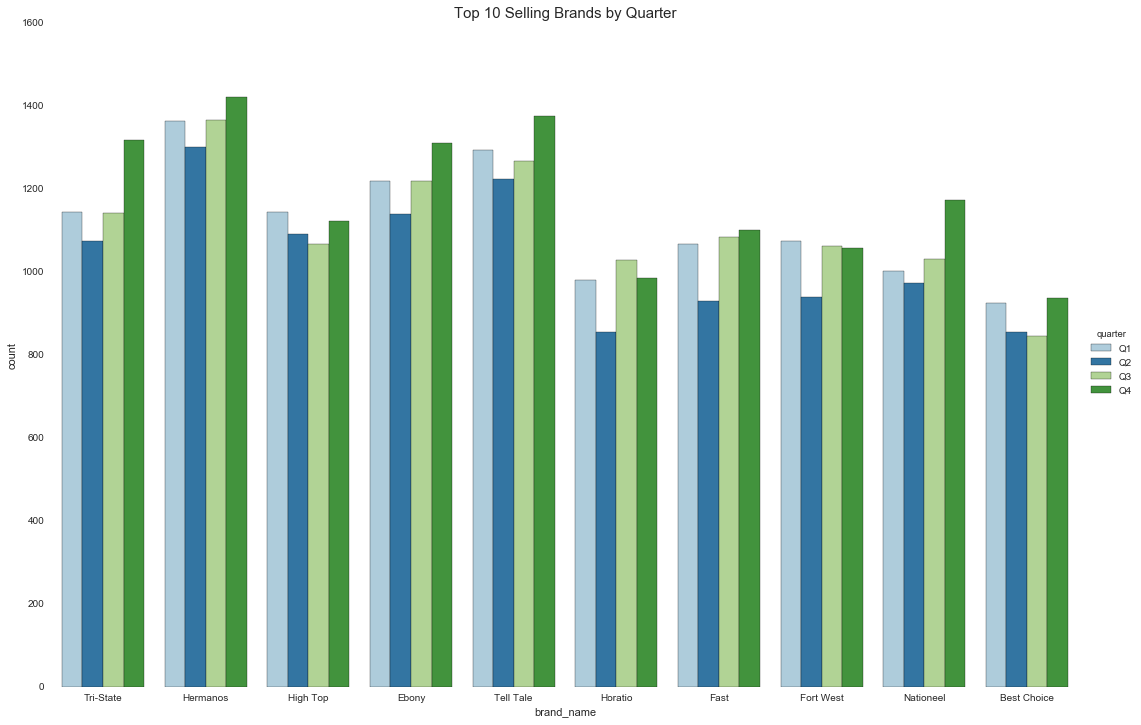

In [108]:
g = sns.factorplot(x="brand_name",hue = "quarter", data=product_data_quarter, kind="count",
                   palette="Paired", size=10, aspect=1.5, order=product_data.brand_name.value_counts().iloc[:10].index, hue_order =["Q1","Q2","Q3","Q4"])
sns.plt.title('Top 10 Selling Brands by Quarter',fontsize=15)

These views give us a more granular look at how these products and brands are performing. For example, we can see that for the categories, most of them followed a similar trend of doing well in Q1, slowing down a bit in Q2 and Q3, and then performing well in Q4.

#Question 2

Foodmart is developing their strategy for the next year. One of their goals is to increase sales and profitability. Please provide the executive team with insights from the data that highlight growth opportunities. Here are some ideas to get you started:

- Expand product offerings: which products or categories should we expand and why?
- Offer more promotions: how should we target our promotions and why?
- Market to a certain customer segment: what segment of customers should we market to and how?

Feel free to think of other ideas. Please focus on only 1 to 2 opportunities and provide an executive summary of your recommendations, the potential impact, and what data you found to support your strategy.

**Market to a certain customer segment: what segment of customers should we market to and how?**

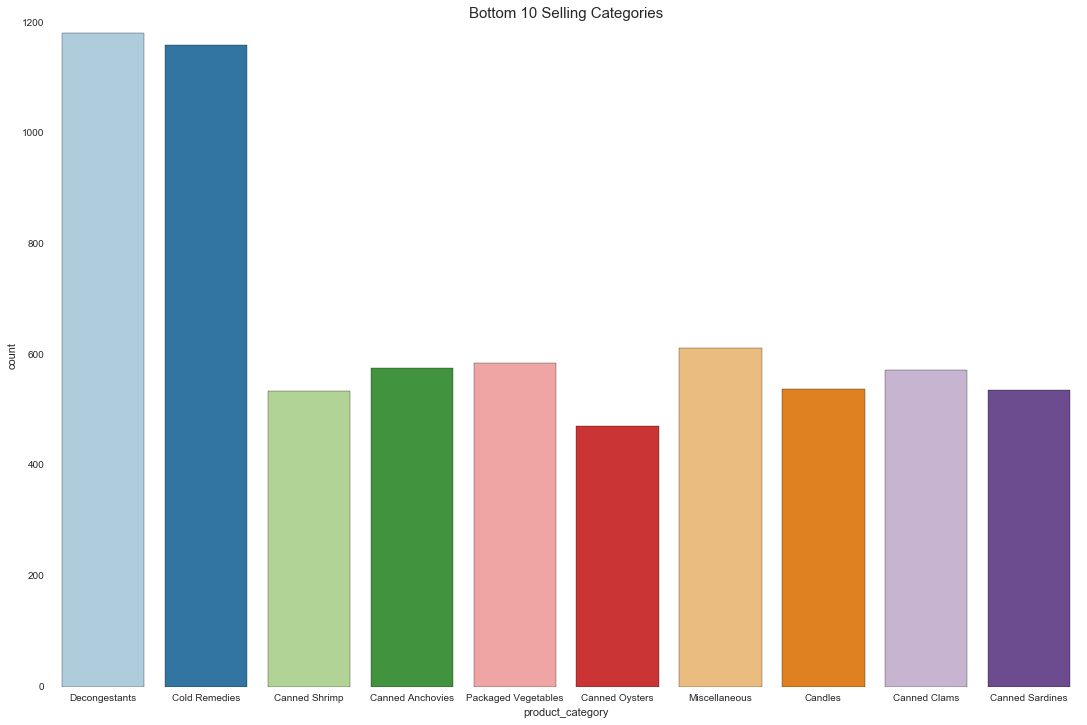

In [109]:
g = sns.factorplot(x="product_category", data=product_data_quarter, kind="count",
                   palette="Paired", size=10, aspect=1.5, order=product_data.product_category.value_counts().iloc[-10:].index)
sns.plt.title('Bottom 10 Selling Categories',fontsize=15)
g.savefig("output.png",format='eps', dpi=900)

##Apriori Data Set Up

In [110]:
transactions.head()

,product_id,customer_id,store_id,promotion_id,month_of_year,quarter,the_year,store_sales,store_cost,unit_sales,fact_count
0,1,157,24,1869,12,Q4,1997,8.55,2.9925,3,1
1,1,456,15,0,6,Q2,1997,11.40,4.3320,4,1
2,1,638,11,0,9,Q3,1997,8.55,2.9925,3,1
3,1,916,7,0,4,Q2,1997,11.40,4.9020,4,1
4,1,923,15,0,7,Q3,1997,8.55,2.7360,3,1


In [111]:
product.head()

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,0,0,30,14,16.9,12.60,7.40
1,52,2,Washington,Washington Mango Drink,96516502499,0.74,7.42,4.42,0,1,18,8,13.4,3.71,22.60
2,52,3,Washington,Washington Strawberry Drink,58427771925,0.83,13.10,11.10,1,1,17,13,14.4,11.00,7.77
3,19,4,Washington,Washington Cream Soda,64412155747,3.64,10.60,9.60,1,0,26,10,22.9,18.90,7.93
4,19,5,Washington,Washington Diet Soda,85561191439,2.19,6.66,4.65,1,0,7,10,20.7,21.90,19.20


In [112]:
product_class.head()

,product_class_id,product_subcategory,product_category,product_department,product_family
0,1,Nuts,Specialty,Produce,Food
1,2,Shellfish,Seafood,Seafood,Food
2,3,Canned Fruit,Fruit,Canned Products,Food
3,4,Spices,Baking Goods,Baking Goods,Food
4,5,Pasta,Starchy Foods,Starchy Foods,Food


In [113]:
transactions_merged = pd.merge(transactions,product, how= "left", on= "product_id")
transactions_product = pd.merge(transactions_merged,product_class, how= "left", on= "product_class_id")

In [114]:
cols = ["store_id","promotion_id","month_of_year","quarter","product_category"]

In [115]:
apriori_data = transactions_product[cols]

In [116]:
apriori_data.to_csv("apriori_data.csv")

In [117]:
apriori_data.head()

,store_id,promotion_id,month_of_year,quarter,product_category
0,24,1869,12,Q4,Pure Juice Beverages
1,15,0,6,Q2,Pure Juice Beverages
2,11,0,9,Q3,Pure Juice Beverages
3,7,0,4,Q2,Pure Juice Beverages
4,15,0,7,Q3,Pure Juice Beverages
